In [318]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image

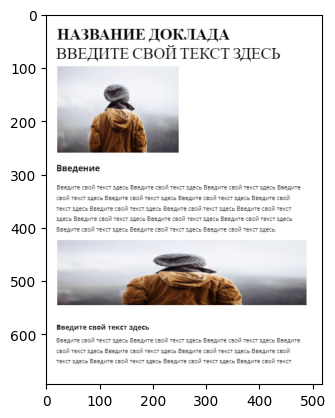

In [319]:
img = Image.open("text_with_img_2.jpg")
plt.imshow(img)

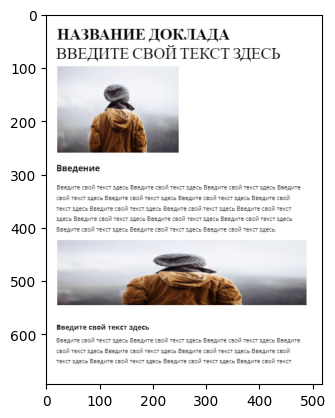

In [320]:
rot = img.rotate(0, expand=True, fillcolor=(255, 255, 255))
plt.imshow(rot)

In [321]:
w, h = rot.size

In [322]:
nprot = np.array(rot).mean(axis=2)
nprot.shape

(694, 518)

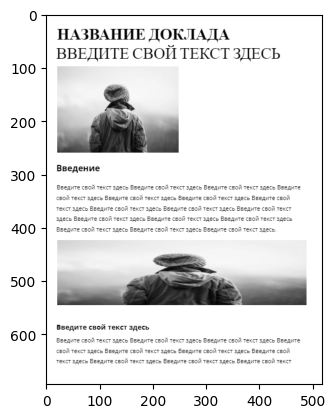

In [323]:
plt.imshow(nprot, cmap='gray')

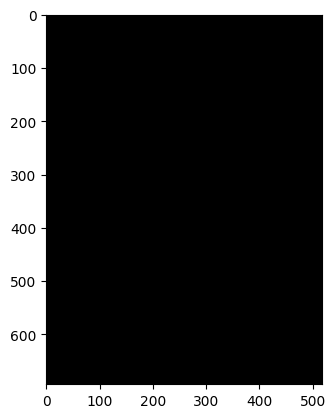

In [331]:
import cv2

blank = np.zeros_like(nprot)
plt.imshow(blank, cmap='gray')

In [325]:
from tqdm.notebook import tqdm

In [326]:
h, w = nprot.shape
w, h

(518, 694)

In [327]:
vals = []
delta = 15

for angle in tqdm(range(-90, 91)):
    tmp = []
    rad = angle * np.pi / 180
    if -90 <= angle < -45 or 45 <= angle < 91:
        step = np.round(h / 2 * np.cos(rad) / np.sin(rad)).astype(int)
        for x in range(-abs(step) // 2, w + abs(step) // 2 + 1, delta):
            cv2.line(blank, (x - step, 0), (x + step, h), 255, 2)
            tmp.append(nprot[blank > 0].mean())
            blank[:, :] = 0
    else:
        step = np.round(w / 2 * np.tan(rad)).astype(int)
        for y in range(-abs(step) // 2, h + abs(step) // 2 + 1, delta):
            cv2.line(blank, (w, y + step), (0, y - step), 255, 2)
            tmp.append(nprot[blank > 0].mean())
            blank[:, :] = 0
    vals.append(np.var(tmp))

  0%|          | 0/181 [00:00<?, ?it/s]

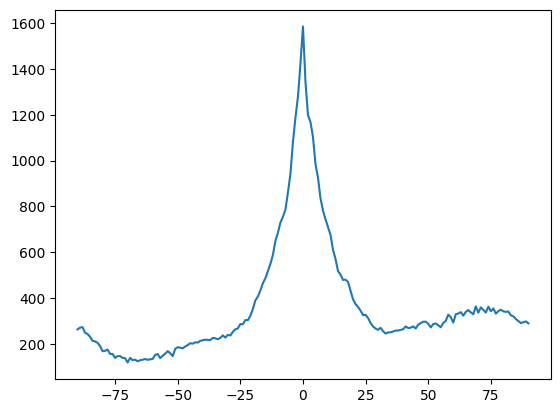

In [328]:
plt.plot(np.arange(-90, 91), vals)
plt.show()

In [329]:
back_angle = np.arange(-90, 91)[np.argmax(vals)]
back_angle

0

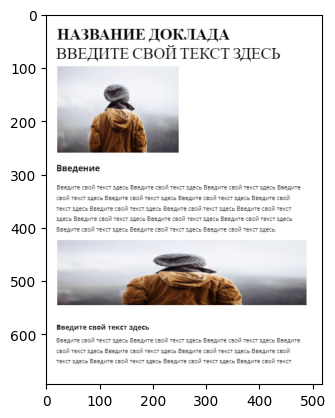

In [330]:
restored = rot.rotate(back_angle, fillcolor=(255, 255, 255))
plt.imshow(restored)